In [1]:
import pandas as pd
from datetime import datetime

In [2]:
def get_df(date):
    y, m, d = date.isoformat()[:10].split("-")
    assert len(y) == 4
    assert len(m) == 2
    assert len(d) == 2
    base = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
    url = base + f"{m}-{d}-{y}.csv"
    df = pd.read_csv(url)
    return df

def clean(df):
    df["state"] = df["Province/State"]
    df["confirmed"] = df["Confirmed"]
    df["time"] = df["Last Update"]
    return df[["state", "confirmed", "time"]]

import pandas as pd
dates = pd.date_range(datetime(2020, 3, 10), datetime.now(), freq="1D")
rows = []
for date in dates[:-1]:
    df = get_df(date)
    idx = df["Country/Region"] == "US"
    df = df[idx]
    print(df.columns)
    row = clean(df)
    rows.append(row)

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Lati

In [3]:
df = pd.concat(rows)
df["datetime"] = pd.to_datetime(df["time"])

In [4]:
pops = pd.read_html("population.html")[0]
pops.set_index("State", inplace=True)
pops = pops["Population estimate, July 1, 2019[2]"]

In [5]:
df.columns

Index(['state', 'confirmed', 'time', 'datetime'], dtype='object')

In [6]:
import numpy as np
df["rate"] = np.nan
for state in df.state.unique():
    idx = df.state == state
    if "princess" in state.lower():
        continue
    if "Virgin" in state:
        state = "U.S. Virgin Islands"
    if "US" in state:
        continue
    df.loc[idx, "rate"] = df.loc[idx, "confirmed"] / pops[state]

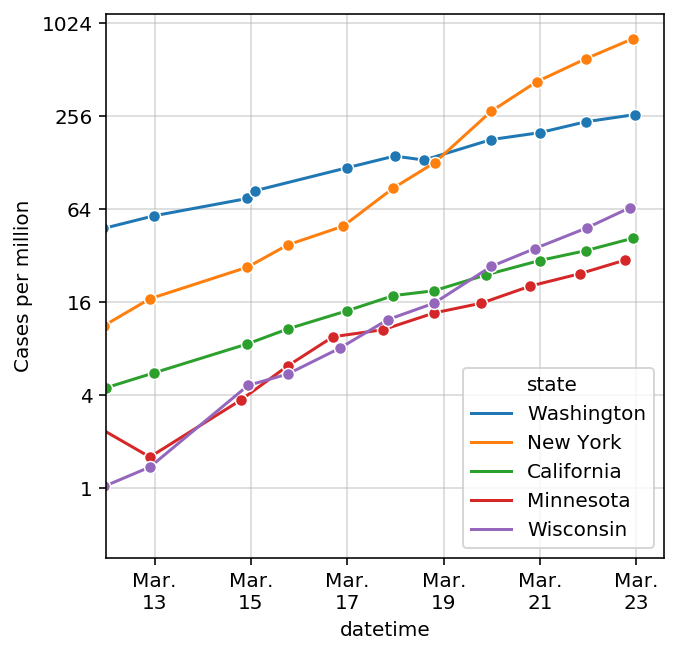

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

states_to_show =  ["Washington", "New York", "California", #"Illinois",
                   "Minnesota", "Wisconsin"]
df["conc"] = df["rate"] * 1e6
w = 5
fig, ax = plt.subplots(figsize=(w, w))
ax = sns.lineplot(
    x="datetime",
    y="conc",
    hue="state",
    hue_order=states_to_show,
    data=df[df.state.isin(states_to_show)],
    marker="o",
)

ax.grid(alpha=0.5)
ax.set_yscale("log", basey=2)
ax.set_xlim(mdates.date2num(datetime(2020, 3, 12)), None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b.\n%d'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: str(int(x))))
ax.set_ylabel("Cases per million")

ax.legend(loc="best")